# SEC 210  Final Exam - Fall 2020

### INSTRUCTIONS
- The exam is worth 100 points. You have until 5:30 pm tomorrow to complete and submit your exam via LMS.
- The exam is open book,  open notes, open computer/internet, however sharing your notebook or code with your friends or discussing the answers with others is not allowed.
- You may email any clarification questions you have to me.
- Do not use features of the Python language that have not been described in this course.
- In any part, you are free to use any tables, arrays, or functions that have been defined in previous parts of the same question.
- When writing code develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 
- Please make sure you run all the code before submission.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### 1. NBA Salaries (12 points) 
Run the ode in the following cell to read and review the NBA salaries data we used in our lecture before.

In [2]:
salaries = Table.read_table('nba_salaries.csv')
salaries.show(10)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


**Question 1** What is the total salary paid to all players? 

In [14]:
total_salary = salaries.column(3).sum()
total_salary

2116.197639

**Question 2.** Display the center players (players whose`POSITION` is equivalent to C) who earn more than one million dollars. 

In [24]:
centers = salaries.where(1,"C").where(3, are.above(1))
centers

PLAYER,POSITION,TEAM,'15-'16 SALARY
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Tyler Zeller,C,Boston Celtics,2.61698
Jared Sullinger,C,Boston Celtics,2.56926
Kelly Olynyk,C,Boston Celtics,2.16516
Andrea Bargnani,C,Brooklyn Nets,1.3629
Al Jefferson,C,Charlotte Hornets,13.5
Cody Zeller,C,Charlotte Hornets,4.2042
Frank Kaminsky III,C,Charlotte Hornets,2.61252
Joakim Noah,C,Chicago Bulls,13.4


**Question 3.** Which team does the highest paid player play in?

In [30]:
team_name = salaries.sort(3,descending=True).column("TEAM").take(0)
team_name

'Los Angeles Lakers'

**Question 4.** What is the total salary paid to players in each team? 

In [45]:
total_salary_per_team = salaries.select(2,3).group(0,sum)
total_salary_per_team

TEAM,'15-'16 SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


**Question 5.** Create a new table that contains the highest paid 10 players and assign it to `top_10`. Add a new column to the table `top_10` labeled `SALARY SHARE` that contains the share of the player's salary among all player salaries.

In [47]:
my_table=salaries.sort(3,descending=True).take(np.arange(10))
my_table

PLAYER,POSITION,TEAM,'15-'16 SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


In [65]:
top_10 = my_table.with_column("SALARY SHARE", my_table.column(3)/total_salary)
top_10.set_format(4,PercentFormatter)
top_10

PLAYER,POSITION,TEAM,'15-'16 SALARY,SALARY SHARE
Kobe Bryant,SF,Los Angeles Lakers,25,1.18%
Joe Johnson,SF,Brooklyn Nets,24.8949,1.18%
LeBron James,SF,Cleveland Cavaliers,22.9705,1.09%
Carmelo Anthony,SF,New York Knicks,22.875,1.08%
Dwight Howard,C,Houston Rockets,22.3594,1.06%
Chris Bosh,PF,Miami Heat,22.1927,1.05%
Chris Paul,PG,Los Angeles Clippers,21.4687,1.01%
Kevin Durant,SF,Oklahoma City Thunder,20.1586,0.95%
Derrick Rose,PG,Chicago Bulls,20.0931,0.95%
Dwyane Wade,SG,Miami Heat,20,0.95%


**Question 6.**  Create a new table `average_salaries` that has one row for each team and has one column for each position and displays the average salary that is paid to the players in each position in each team.

In [62]:
testt=salaries.where(2,"Atlanta Hawks").where(1,"C")
testt

PLAYER,POSITION,TEAM,'15-'16 SALARY
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Walter Tavares,C,Atlanta Hawks,1


In [63]:
average_salaries = salaries.select(2,1,3).group([0,1],np.mean)
average_salaries

TEAM,POSITION,'15-'16 SALARY mean
Atlanta Hawks,C,7.58542
Atlanta Hawks,PF,11.0025
Atlanta Hawks,PG,4.8817
Atlanta Hawks,SF,3
Atlanta Hawks,SG,1.80969
Boston Celtics,C,2.45046
Boston Celtics,PF,3.08548
Boston Celtics,PG,4.97465
Boston Celtics,SF,4.41716
Boston Celtics,SG,2.00755


### 2. Histogram (10 points)
500 women age 25 to 49 in steady relationships were surveyed. Each woman was asked her age in years and
whether she was married to her partner. There were 400 unmarried and 100 married women among those
surveyed. The histograms below visualize the ages of these two groups of women.

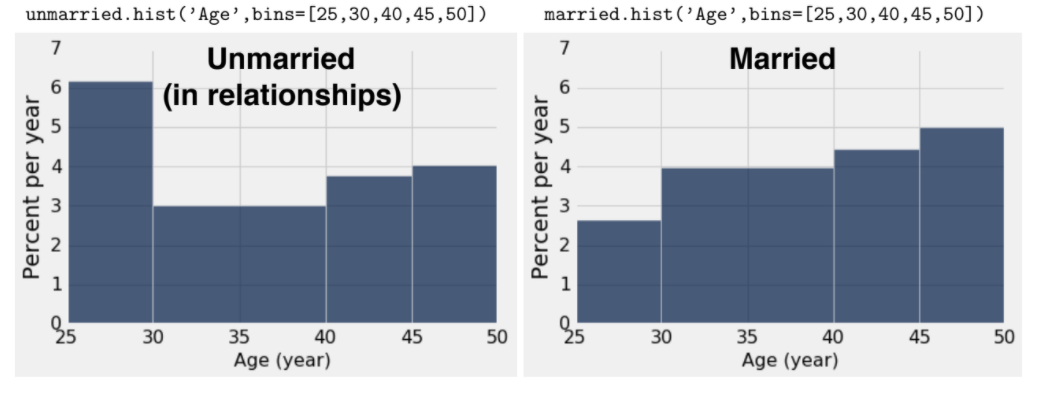

**Question 1.** For each pair of quantities, compare them using the information above and choose one of following:

    (A): (I) is larger.

    (B): (II) is larger.

    (C): (I) and (II) are about the same.

    (D): There is not enough information to compare (I) and (II).

*** You must briefly justify your answer to receive full credit. ***

**Question 1.a.** (I) The number of unmarried women age 25-29 vs (II) The number of unmarried women age 30-39

A)
number of unmarried 25-29= 400*(30.5%)= 122
number of unmarried 30-39 = 400*(30%)=120

**Question 1.b.** (I) Among the unmarried women, the proportion who are of age 25-29 vs (II) Among the married women, the proportion who are of age 45-49

A)
proportion of unmarried 25-29= (6.1*5)%=30.5%
proportion of married 45-49= (5*5)%= 25%

**Question 1.c.** (I) The number of unmarried women age 30-39 vs 
(II) The number of married women

A) 
the number of unmarried 30-39 = 400*30%= 120
the number of married women= 100

**Question 1.d.** (I) The 20th percentile age of unmarried women vs (II) The 20th percentile age of married women

B) 
20th percentile age of unmarried women falls between(25 and 30)
20th percentile age of married woman falls between(30 and 35).
2nd range is always larger than first range

**Question 1.e.** (I) The proportion of married women age 30-34 vs 
(II) The proportion of married women age 35-39

C)
The proportion of married women age 30-34=(4*5)%= 20%
The proportion of married women age 35-39=(4*5)%= 20%

**Question 2.** What proportion of everyone surveyed were in the age range 30-39?

number of unmarried between 30-39= 30%*400= 120
number of married between 30-39= 40%*100 = 40
(120+40)/500= 32%


**Question 3.** If you select a woman uniformly at random from those surveyed and find out that her age is in
the range 30-39, what is the chance that she is married?

number of unmarried 30-39= 120
number of married 30-39 = 40
chance that she is married is 40/160 = 1/4 or 25%

### 3. Probability (10 points) 
A basket contains 10 colored balls: 3 red, 2 green, 4 yellow, and 1 blue ball. 

In each part below write a mathematical expression that evaluates to the probability described. You do not need to simplify any arithmetic. 


**Question 1** When you draw three balls **without replacement**, what is the probability that all of them are red?

(3/10)*(2/9)*(1/8)

**Question 2** When you draw two balls **without replacement**, what is the probability that the first ball is yellow and the second ball is red?

(4/10)*(3/9)

**Question 3** When you draw three balls **with replacement**, What is the probability that you get a yellow ball each time?

(4/10)^3

**Question 4** When you draw four balls **with replacement**, What is the probability that you do not get either a red ball or blue ball?

4 yellow = (4/10)^4
4 green= 0
3 yellow 1 green= (4/10)^3 * (2/10)
3 green 1 yellow= 0
2 green 2 yellow= (2/10)^2 * (4/10)^2

(4/10)^4 +((4/10)^3 * (2/10)) + ((2/10)^2 * (4/10)^2)

### 4. Causes of Deaths (10 points) 
In the following section, first  you will investigate the major causes of death in the world during the past century (from 1900 to 2015).Then, you will look at data from the Framingham Heart Study, an observational study into cardiovascular health.

Run the following cell to read in and view the `causes_of_death` table, which documents the death rate for major causes of deaths over the last century (1900 until 2015).

In [68]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show()

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2
2014,Heart Disease,167
2014,Cancer,161.2
2014,Stroke,36.5
2014,Accidents,40.5
2014,Influenza and Pneumonia,15.1


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

If we look at unadjusted data, the age distributions of each sample will influence death rates. In an older population, we would expect death rates to be higher for all causes since old age is associated with higher risk of death. To compare death rates without worrying about differences in the demographics of our populations, we adjust the data for age.

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. 

You aren't responsible for knowing how to do this adjustment, but should understand why we adjust for age and what the consequences of working with unadjusted data would be. 

**Question 1.** What are all the different causes of death in this dataset? Assign an array of all the unique causes of death to `all_unique_causes`.


In [70]:
test=causes_of_death.group(1)
test

Cause,count
Accidents,116
Cancer,116
Heart Disease,116
Influenza and Pneumonia,116
Stroke,116


In [71]:
all_unique_causes = causes_of_death.group(1).column(0)
sorted(all_unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

**Question 2.** Find the year and the cause for the highest Age Adjusted Death Rate in the data. You should create a table that contains the Year, Cause and Age Adjusted Death Rate for the highest Age Adjusted Death Rate and assign it to `highest_age_adjusted_death_rate`.

In [106]:
test=causes_of_death.sort(2,descending=True)
test

Year,Cause,Age Adjusted Death Rate
1918,Influenza and Pneumonia,612.4
1950,Heart Disease,588.8
1949,Heart Disease,581
1951,Heart Disease,577.9
1953,Heart Disease,570.1
1952,Heart Disease,568.8
1957,Heart Disease,568.5
1943,Heart Disease,567.5
1958,Heart Disease,563.6
1963,Heart Disease,563.4


In [354]:
highest_age_adjusted_death_rate =causes_of_death.sort(2,descending=True).take(0)
highest_age_adjusted_death_rate 


Year,Cause,Age Adjusted Death Rate
1918,Influenza and Pneumonia,612.4


**Question 3** We would like to plot the death rate for each disease over time. To do so, we must create a table with one column for each cause and one row for each year.

Create a table called `causes_for_plotting`. It should have one column called `Year`, and then a column with age-adjusted death rates for each of the causes you found in Question 1. There should be as many of these columns in `causes_for_plotting` as there are causes in Question 1.

*Hint*: Use `pivot`, and think about how the `first` function might be useful in getting the **Age Adjusted Death Rate** for each cause and year combination.


In [102]:
test=causes_of_death.pivot(1,0,2,collect =max)
test

Year,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2
1905,108.5,132.5,327.8,257.8,247.3
1906,121.2,128.8,325.5,222.5,245.9
1907,122.3,133,356.5,285.4,261.8
1908,108.8,134.5,328.6,234.6,239
1909,108,138.1,329.2,221.2,237.5


In [111]:
test=causes_of_death.sort(0)
test

Year,Cause,Age Adjusted Death Rate
1900,Heart Disease,265.4
1900,Cancer,114.8
1900,Stroke,244.2
1900,Accidents,90.3
1900,Influenza and Pneumonia,297.5
1901,Heart Disease,272.6
1901,Cancer,118.1
1901,Stroke,243.6
1901,Accidents,109.3
1901,Influenza and Pneumonia,312.9


In [ ]:
# This function may be useful 
def first(x):
    return x.item(0)
#no need for this function

In [113]:
causes_for_plotting = causes_of_death.pivot(1,0,2,collect =max)
causes_for_plotting.show(5)

Year,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2


Let's take a look at how age-adjusted death rates have changed across different causes over time. Run the next cell to create a line plot to compare Heart Disease (a chronic disease) and Influenza and Pneumonia (infectious diseases).

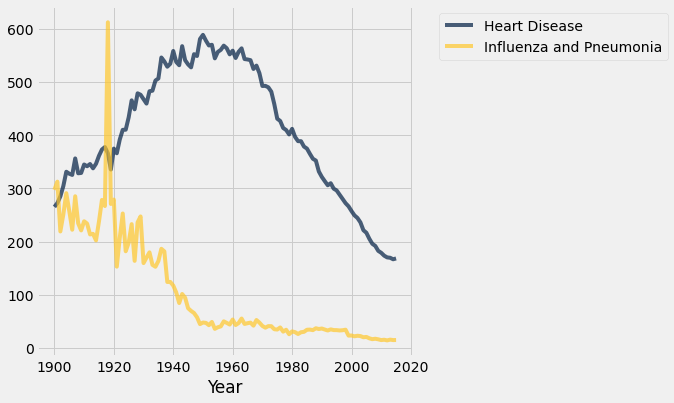

In [114]:
causes_for_plotting.select('Year', "Heart Disease", "Influenza and Pneumonia").plot('Year')

**Question 4.** Beginning in 1900, we observe that death rates for Influenza and Pneumonia decrease while death rates for Heart Disease increase. What might have caused this shift?

Assign `disease_trend_explanation` to an array of integers that correspond to possible explanations for these trends.

1. People are living longer, allowing more time for chronic conditions to develop. 
2. A cure has not been discovered for influenza, so people are still dying at high rates from the flu.
3. Improvements in sanitation, hygiene, and nutrition have reduced the transmission of viruses and bacteria that cause infectious diseases.
4. People are more active, putting them at lower risk for conditions like heart disease and diabetes.
5. Widespread adoption of vaccinations has reduced rates of infectious disease.
6. The medical community has became more aware of chronic conditions, leading to more people being diagnosed with heart disease.

*Hint:* Consider what contributes to the development of these diseases. What decreases the transmission of infections? Why do we see more lifestyle-related conditions like heart disease?


In [120]:
#influenza aşısı 1940
#pnemonia aşısı 1977

In [121]:
disease_trend_explanation = [6,5,3,1]
disease_trend_explanation

[6, 5, 3, 1]

This phenomenon is known as the epidemiological transition - in developed countries, the severity of infectious disease has decreased, but chronic disease has become more widespread. Coronary heart disease (CHD) is one of the most deadly chronic diseases that has emerged in the past century, and more healthcare resources have been invested to studying it.

Run the cell below to see what a plot of the data would have looked like had you been living in 1950. CHD was the leading cause of death and had killed millions of people without warning. It had become twice as lethal in just a few decades and people didn't understand why this was happening.

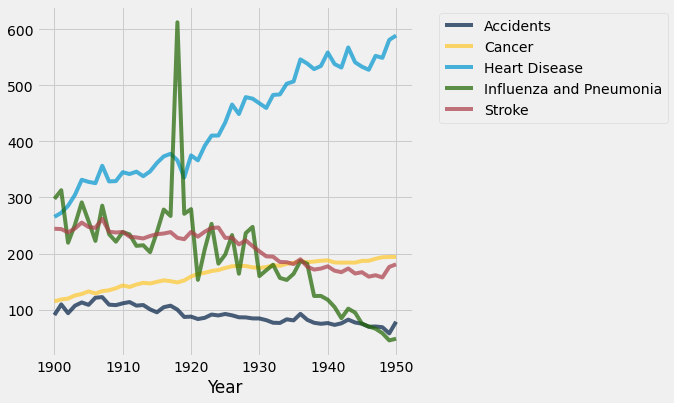

In [122]:
# Do not change this line
causes_for_plotting.where('Year', are.below_or_equal_to(1950)).plot('Year')

The view from 2016 looks a lot less scary, however, since we know it eventually went down. The decline in CHD deaths is one of the greatest public health triumphs of the last half century. That decline represents many millions of saved lives, and it was not inevitable. The Framingham Heart Study, in particular, was the first to discover the associations between heart disease and risk factors like smoking, high cholesterol, high blood pressure, obesity, and lack of exercise.

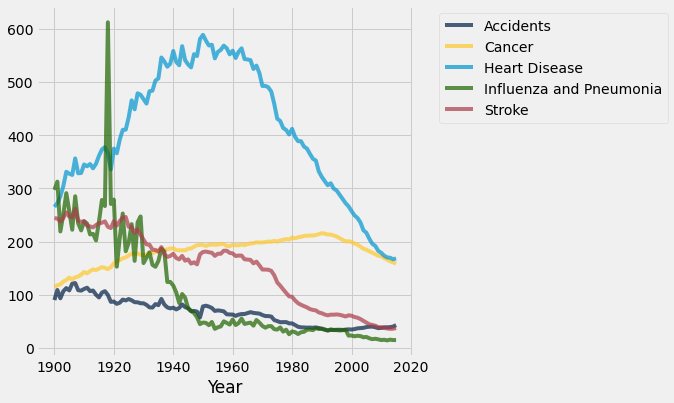

In [123]:
# Do not change this line
causes_for_plotting.plot('Year')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and diet on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease is still higher than the death rates of all other causes. Even though the death rate is starkly decreasing, there's still a lot we don't understand about the causes (both direct and indirect) of heart disease.

## 5. The Framingham Heart Study (20 points) 
The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this section, we'll investigate some of the study's key findings about cholesterol and heart disease.

Run the cell below to examine data for almost 4,000 subjects from the first wave of the study, collected in 1956.

In [124]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study this is because subjects who already had heart disease or had missing data are excluded.

#### Diabetes and the Population
Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the percentage of the population who have it) in the U.S. around this time was 0.93%. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 1**: What is the observed value of the statistic in the data from the Framingham Study? You should convert prevalence values to proportions before calculating the statistic!


In [125]:
observed = sum(framingham.column("DIABETES"))/4000
observed

0.02625

In [127]:
observed = sum(framingham.column("DIABETES"))/4000
observed_diabetes_distance =abs(observed - 0.0093)
observed_diabetes_distance

0.01695

**Question 2**: Define the function `diabetes_statistic` which should return exactly one simulated statistic of the absolute distance between the observed prevalence and the true population prevalence under the null hypothesis. Make sure that your simulated sample is the same size as your original sample.

*Hint:* The array `diabetes_proportions` contains the proportions of the population without and with diabetes.


In [130]:
diabetes_proportions = make_array(.9907, .0093)

def diabetes_statistic():
    #????????????????????????????
    

**Question 3**:  Complete the following code to simulate 5000 values of the statistic under the null hypothesis.


In [136]:
diabetes_simulated_stats = make_array()
diabetes_proportions = make_array(.9907, .0093)

for i in np.arange(5000):
    sim_stat = sample_proportions(4000, diabetes_proportions).item(1)
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, sim_stat)
    
                                         
diabetes_simulated_stats

array([0.01175, 0.0085 , 0.00775, ..., 0.009  , 0.01125, 0.00775])

**Question 4** Create a histogram of the simulated values of your statistic. Do not delete or modify the code in the next cell. It will plot the observed value along with your histogram.

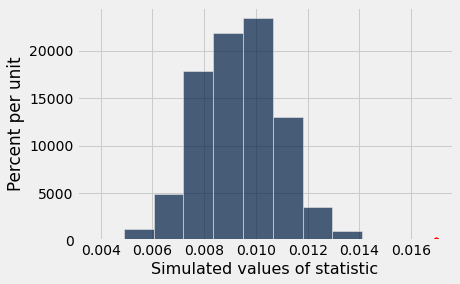

In [140]:
# create a histogram
Table().with_column('Simulated values of statistic', diabetes_simulated_stats).hist()

# do not change this line
plots.scatter(observed_diabetes_distance, 0, color='red', s=30);

**Question 4**: Based on the histogram above, should you reject the null hypothesis?


Yes we should reject because the observed value is too different than the values that we simulated.

**Question 5**: Why might there be a difference between the population and the sample from the Framingham Study? Assuming that all these statements are true - what are possible explanations for the higher diabetes prevalence in the Framingham population?

Assign the name `framingham_diabetes_explanations` to an array of the following explanations that **are possible and consistent** with the trends we observe in the data and our hypothesis test results. 

1. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed). By contrast, the Framingham participants were less likely to go undiagnosed because they had regular medical examinations as part of the study.
2. The relatively wealthy population in Framingham ate a luxurious diet high in sugar (high-sugar diets are a known cause of diabetes).
3. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.


In [141]:
framingham_diabetes_possibilities = [1,2,3]
framingham_diabetes_possibilities

[1, 2, 3]

In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting more information from each person in the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### 6. Hypothesis Testing (4 points)

**Question 1.** Suppose that a backgammon tournament is trying to pick some dice that will be used in the tournament. The following pair of hypothesis is used for this purpose:

Null: The die is fair.

Alternative: The die is not fair.

Each die is tested by checking the number of times 6 is rolled, based on the same large number of rolls. 5% cutoff is used for the P-value and 100 dice are tested. 

If all the dice were fair to begin with, howm many of the dice will be concluded as not fair?
Pick one option and justify your choice.

(i) No die (ii) 1 die (iii) 2 dice (iv) 5 dice (v) 50 dice

In [355]:
#IV) because our confident level is 95% which means that we are 95% confident that the die is fair.
#so we have at most 5% margin of error.it equals 100*5% = 5 dice

### 7. Prevalence of Childhood Obesity (10 points)
According to the WHO European Childhood Obesity Surveillance Initiative (COSI) 2013, 22.5% of 7–8 year-olds in the country were obese or overweight (14.2% overweight, 8.3% obese). According to global trends, the prevalence of childhood overweight and obesity has been growing. Zeynep is a PhD student studying childhood obesity. She believes Turkey is following the global trends in terms of obesity and have more obese children today compared to 2013. She samples 1000 children at random at the ages of 7 and 8 and finds that 121 of these are obese. 


**Question 1.** You would like to test, if the chance that a random child is obese is more than 8.3% or not. Write down you null and alternative hypothesis.

null_hypothesis = chance that a random child is obese is more than 8.3%
alternative_hypothesis = chance that a random child is obese is not more than 8.3%

**Question 2.** You choose the following test statistic: the number of obese children minues 83. You want to work with Zeynep to test this hypothesis. Design a simulation and test this hypothesis. Write the code, run your simulation, decide on a cuoff for p-value, and provide your conclusion of your hypothesis test.

## 8. Sampling Basketball Data (22 points)

We have two datsets that contain data about NBA players - player and salary datasets. Run the cell below to load these datasets. 

In [147]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)


Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


**Question 1.** Join the two tables to create a dataset that contains all the infromation about players in one table. 

In [329]:
full_data = player_data.join("Name", salary_data, "PlayerName")
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
A.J. Price,28,TOT,26,32,46,7,0,14,133,62552
Aaron Brooks,30,CHI,82,166,261,54,15,157,954,1145685
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040


In [330]:
full_data.sort(10,descending=True).set_format(10,NumberFormatter)


Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
Kobe Bryant,36,LAL,35,199,197,47,7,128,782,"23,500,000"
Amar'e Stoudemire,32,TOT,59,329,45,29,38,78,680,"23,410,988"
Joe Johnson,33,BRK,80,384,292,59,14,137,1154,"23,180,790"
Carmelo Anthony,30,NYK,40,264,122,40,17,89,966,"22,458,401"
Dwight Howard,29,HOU,41,431,50,28,53,115,646,"21,436,271"
Chris Bosh,30,MIA,44,310,95,41,25,95,928,"20,644,400"
LeBron James,30,CLE,69,416,511,109,49,272,1743,"20,644,400"
Chris Paul,29,LAC,82,376,838,156,15,190,1564,"20,068,563"
Deron Williams,30,BRK,68,237,448,64,17,154,884,"19,754,465"
Rudy Gay,28,SAC,68,399,250,71,41,183,1432,"19,317,326"


The above dataset is the full populatin dataset. In this section, you will imagine that we had gotten data on only a smaller subset of the players. You will get the samples from the population and then use it to estimate some population parameters. Then you will compare your estimates with the population parameter. 

**Question 2.** To save typing and increase the clarity of your code, I want you to package the analysis code into a few functions. First, define a `age_histogram` function, which takes a table with column `Age` and draws a histogram for `Age`. It should use bins in the range of the age values in the table, i.e., starting from the minimum age going upto including the maximum age in the table with widths of 1. 

In [150]:
full_data.column(1).max()

38

In [151]:
full_data.column(1).min()

19

In [198]:
def age_histogram(table):
    table.select("Age").hist(bins=np.arange(19, 39, 1))

Call your function to create a histogram of the age distribution in your population


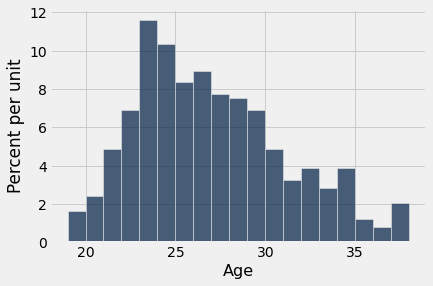

In [199]:
age_histogram(full_data)

**Question 3.** Now, define a `salary_histogram` function, which takes a table with column `Salary` and draws a histogram for `Salary` in millions of dollars. The bins should starting from the minimum salary in the table upto (including) the maximum salary in the table with widths of 1 million dollars. 

In [200]:
full_data.column("Salary").min()

14409

In [201]:
full_data.column("Salary").max()

23500000

In [203]:
def salary_histogram(table):
    table.select("Salary").hist(bins=np.arange(14409, 23500001, 1000000))

Call your `salary_histogram` function, to create a histogram of the salary distribution in your population

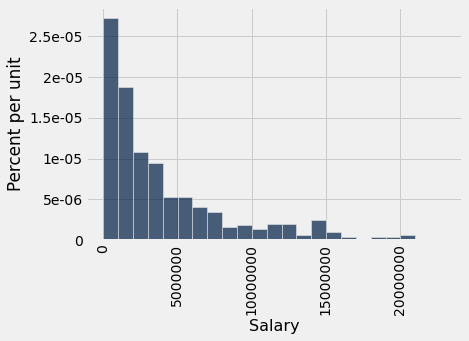

In [204]:
salary_histogram(full_data)

**Question 4.** Suppose you did not have the population data, you wanted to survey some players to get their salary information, in order to estimate the median salary of NBA players. You thought reaching the more experienced players would be difficult, so you surveyed younger players ages less than 22. Would this be a good sample to estimate the population median? Why or why not? 


No. it wont be a random sample. we need to survey among all players for more accurate median estimation

**Question 5.**  Assign `young_sample` to a subset of `full_data` that contains only the data for players under the age of 22. 
Then call your histogram functions to generate the age and salary histograms for your sample. 


In [219]:
young_sample= full_data.where("Age",are.below(22))
young_sample

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Alex Len,21,PHO,69,454,32,34,105,74,432,3649920
Andre Drummond,21,DET,82,1104,55,73,153,120,1130,2568360
Andrew Wiggins,19,MIN,82,374,170,86,50,177,1387,5510640
Anthony Bennett,21,MIN,57,216,48,27,16,36,298,5563920
Anthony Davis,21,NOP,68,696,149,100,200,95,1656,5607240
Archie Goodwin,20,PHO,41,74,44,18,9,48,231,1112280
Ben McLemore,21,SAC,82,241,140,77,19,138,996,3026280
Bradley Beal,21,WAS,63,241,194,76,18,123,962,4505280
Bruno Caboclo,19,TOR,8,2,0,0,1,4,10,1458360


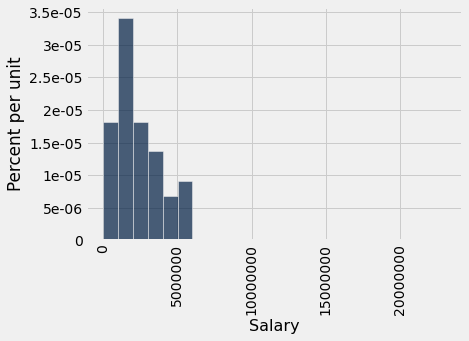

In [220]:
salary_histogram(young_sample)

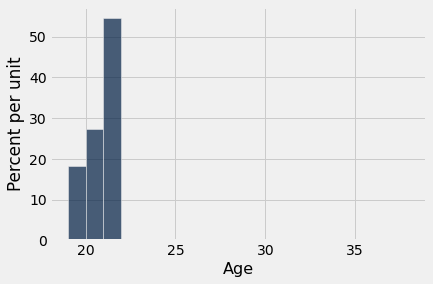

In [221]:
age_histogram(young_sample)

**Question 6.** Do the distributions in your sample resemble the population distributions? Would you expect it to, in general?

no they dont resemble. we shouldnt restrict our population according to their features while sampling because it wont be a random sampling.

**Question 7.** Next, produce a simple random sample of size 50, sampling uniformly at random with replacement, from the `full_data` and assign it to `random_sample`. Then draw the histogram of age and salaries in this sample.

In [337]:
random_sample= full_data.sample(50,with_replacement=True)
random_sample

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
Alonzo Gee,27,TOT,54,94,25,35,7,33,241,1063384
Omer Asik,28,NOP,76,748,72,29,54,95,557,14898938
Erick Green,23,DEN,43,31,39,12,0,14,146,507336
Jack Cooley,23,UTA,16,25,1,6,3,3,27,65000
John Henson,24,MIL,67,312,59,28,135,87,470,1987320
Quincy Pondexter,26,TOT,75,195,94,19,24,51,538,3146068
Gerald Henderson,27,CHO,80,273,206,51,22,110,969,6000000
Julius Randle,20,LAL,1,0,0,0,0,1,2,2997360
Luke Babbitt,25,NOP,63,111,24,17,11,26,256,981084
Marcus Thornton,27,TOT,48,86,36,27,7,27,380,8575000


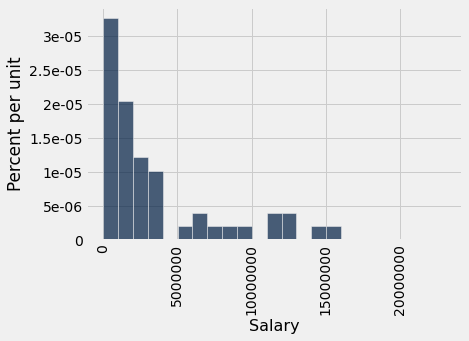

In [338]:
salary_histogram(random_sample)

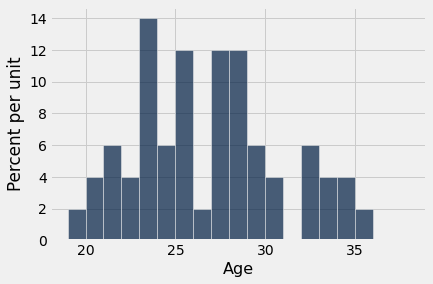

In [339]:
age_histogram(random_sample)

**Question 8.** Suppose you want to estimate the average age of players in the NBA. IF you did not have the  population data, do you think this would be a good sample to estimate it?

this is just one sample, it wouldnt be that good because we need to take more sample to reach a more accurate average estimation. we can use bootstrap technique.

**Question 9.** You decide to use your random sample to estimate the average age of all NBA players. Write a function `bootstrap_means` to create bootstrap samples from your random sample.  The function should take an argument N which is the number of resamples it wil craete, and returns an array that contains the resampled means.

In [340]:
def bootstrap_mean(replications):
    
    means=make_array() 
    
    for i in np.arange(replications):
        bootstrap_sample= random_sample.sample()
        resampled_mean= np.mean(bootstrap_sample.column(1)) 
        means= np.append(means, resampled_mean) 
    return means


**Question 10.** Use your `bootstrap_means` function to get the statictics from 5000 bootstrap samples and then plot a histogram of your resampled statistics..

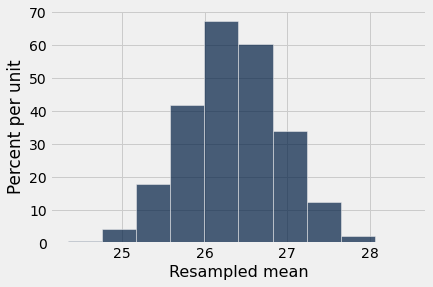

In [341]:
resampled_means=bootstrap_mean(5000)  #5000 kere 50lik sample alıp mean hesaplıyor
res_mean_hist= Table().with_column("Resampled mean", resampled_means).hist(0)

**Question 11.** Compute the 95% confidence interval. 

In [343]:
left= percentile(2.5,resampled_means)
right=percentile(97.5,resampled_means)

interval_95=make_array(left,right)
interval_95

array([25.22, 27.48])

**Question 12.** Does this mean 95% of the NBA player's age are in this range? How do you interpret this interval?

we dont know if the actual population parameter in this interval or not but we are %95 confident that this process creates an interval which contains the population parameter.

**Question 13.** Compare the population parameter with your interval? Is this a good interval?

In [344]:
full_mean=full_data.column(1).mean()
full_mean

26.536585365853657

our interval contains the population mean thats why yes it is a good interval

**Question 14.** Suppose there are 100 students in this class. And everyone generated a different random sample and a 95% confidence interval for their sample for this exam. How many of these intervals would you expect to be good intervals?

In [345]:
def bootstrap_mean2(original_sample, label, replications):
    
    just_one_column=original_sample.select(label)
    means=make_array() 
    
    for i in np.arange(replications):
        bootstrap_sample= just_one_column.sample() 
        resampled_mean= np.mean(bootstrap_sample.column(0)) 
        means= np.append(means, resampled_mean) 
    return means


In [346]:


left_ends = make_array()
right_ends = make_array()

total_age = full_data.select('Age') #neyin üzerinden sample alıcağımı belirticek

for i in np.arange(100): #100 kere left right interval bulucak
    first_sample = total_age.sample(50, with_replacement=True) #populationın age columından 50lik sample aldı
    means = bootstrap_mean2(first_sample, "Age", 5000) #aldığımız sample üzerinden 5000 kere 50lik sample alarak meanlerini hesapladı
    left_ends = np.append(left_ends, percentile(2.5, means)) #leftlerini aldı
    right_ends = np.append(right_ends, percentile(97.5, means)) #rightlarını aldı

intervals = Table().with_columns('Left', left_ends,'Right', right_ends)  
intervals

Left,Right
25.1,27.24
25.12,27.42
24.96,26.84
25.8,27.96
25.04,27.28
26.06,28.58
24.92,26.88
25.3,27.64
25.62,28.06
25.66,28.18


In [347]:
full_data_mean= full_data.column("Age").mean()
full_data_mean


26.536585365853657

In [348]:
good_intervals= intervals.where("Left", are.below(full_data_mean)).where("Right", are.above(full_data_mean))
good_intervals.num_rows
#we expect 95 of them to be good intervals.

95

**Question 15.** Your friend guesses that the median Age of NBA players is 25. Formulate a hypothesis test to see if your friend's guess is right. Write down the null and alternative hypothesis.

NULL: median Age of NBA players is 25
Alternative: median Age of NBA players is not 25

In [349]:
def bootstrap_median(original_sample, label, replications):
    
    just_one_column=original_sample.select(label) #hangi columndan sample alcağımı belirtcek
    medians=make_array() #medianları yazmak için boş bir array
    
    for i in np.arange(replications):
        bootstrap_sample= just_one_column.sample() # istediğimiz columndan sample aldık
        resampled_median= percentile(50,bootstrap_sample.column(0)) #sampleın medianını bulduk
        medians= np.append(medians, resampled_median) #boş medians arrayine bulduğumuz sample medianını ekledik tekrar edicek ark arkaya kaç kere istersek
    return medians

In [350]:
resampled_medians= bootstrap_median(random_sample,"Age",5000) #salary columndan 5000 kere sample aldı arraye yazdırdı
resampled_medians

array([26., 25., 25., ..., 26., 25., 27.])

In [351]:
left= percentile(2.5, resampled_medians)
right= percentile(97.5, resampled_medians)
interval_95= make_array(left,right)
interval_95

array([24., 28.])

Approximate 95% Bootstrap Confidence Interval for the population Median
[24. 28.]


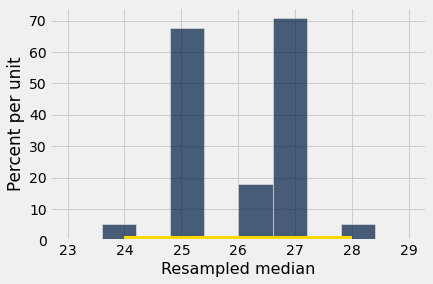

In [352]:
Table().with_column("Resampled median", resampled_medians).hist(0)
plots.plot(interval_95, [0,0], color="gold", lw=8)
print("Approximate 95% Bootstrap Confidence Interval for the population Median")
print(np.round(interval_95,4))

**Question 16.** if you use a 5% cutoff for the p_value, what would be the conclusion of your hypothesis test?

25 is in our interval range. we can say with 95% confident, population age median falls between Age 24-28. Fail to reject null hypothesis. 

**Question 17.** Would you conclusion change if you use a 1% cutoff for the p-value?

It wouldnt change because when p value decreases, Confidence percentage increases. 
so we have 99% confidence level.
When we have larger confidence level, interval also will gets larger.
so age 25 will be still in the interval range when we have 1%cuoff for the p value.


#### Congratulations!, you have completed your exam.